In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import asyncio
import nest_asyncio
import matplotlib.animation
from matplotlib.animation import PillowWriter
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
import sympy as sp

In [2]:
mu=132.712438e18
t0=0
R_earth=1.49870e11
R_mars=1.49870e11 * 1.524
V_earth=np.sqrt(mu/R_earth)
V_mars=np.sqrt(mu/R_mars)
T_earth=2*np.pi*R_earth/np.sqrt(mu/R_earth)
T_mars=2*np.pi*R_mars/np.sqrt(mu/R_mars)
w_earth=2*np.pi/T_earth
w_mars=2*np.pi/T_mars

In [3]:
x_earth=R_earth
y_earth=0
x_mars,y_mars=[],[]
for tt in range(0,int(T_mars/2),86400*10):
    x_mars.append(R_mars*np.cos(w_mars*(tt)))
    y_mars.append(R_mars*np.sin(w_mars*(tt)))

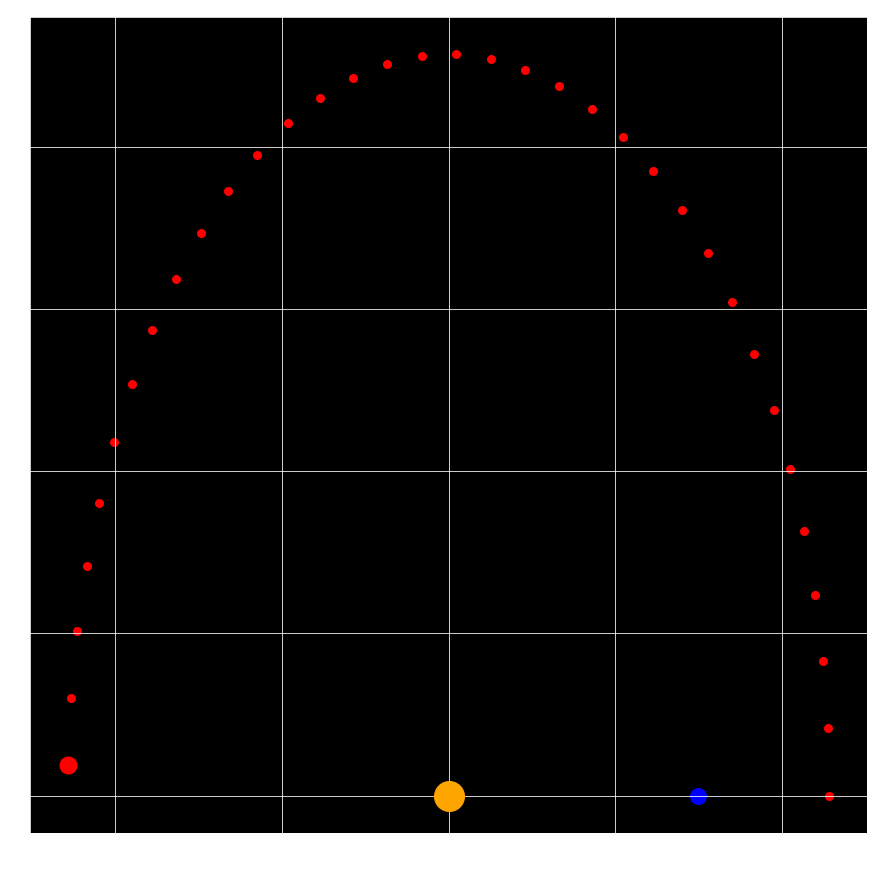

In [4]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(15, 15))
plt.grid()
plt.plot(0,0,marker="o", markersize=30,c='orange')
plt.scatter(x_earth,y_earth,marker="o", c='blue',linewidth=3.0)
plt.scatter(x_earth,y_earth,marker="o", c='blue',linewidth=11.0)
plt.scatter(x_mars,y_mars,marker="o", c='red',linewidth=3.0)
plt.scatter(x_mars[-1],y_mars[-1],marker="o", c='red',linewidth=12.0)
plt.show()

In [5]:
def f(init_values,t):
    x,vx,y,vy=init_values
    dxdt = vx
    dvxdt = (-mu*x)/(np.linalg.norm([x,y])**3)
    dydt = vy
    dvydt = (-mu*y)/(np.linalg.norm([x,y])**3)
    return [dxdt,dvxdt,dydt,dvydt]

In [6]:
best_traj = -1
def lamertasd(params):
    ivl = [R_earth, params[0], 0, V_earth + params[1]]
    sol = odeint(f, ivl, np.linspace(0, 200 * 86400))
    mfinal = np.array([sol[-1, 0], sol[-1, 2]])
    best_norm = float('inf')  
    global best_traj
    
    for i in range(len(x_mars)): 
        mtarget = np.array([x_mars[i], y_mars[i]])
        mm = mtarget - mfinal
        norm = np.linalg.norm(mm)
        if norm < best_norm:
            best_norm = norm
            best_traj = i
    return best_norm  

initial_params = [500, 3000] 
bounds = [(0, 1000), (2000, 4000)] 

result = minimize(lamertasd, initial_params, method='Nelder-Mead', bounds=bounds,options={'disp':True})
optimal_params = result.x
print('Оптимальні ΔV',optimal_params)
print('Найкраща траекторія №:',best_traj)

Optimization terminated successfully.
         Current function value: 14.322824
         Iterations: 113
         Function evaluations: 258
Оптимальні ΔV [ 640.06600863 3140.40694657]
Найкраща траекторія №: 28


In [7]:
def angle_between(v1, v2):
    v1_u = v1/np.linalg.norm(v1)
    v2_u = v2/np.linalg.norm(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))
theta=[]
theta.append(angle_between([x_mars[best_traj],y_mars[best_traj]],[R_earth,0]))

In [8]:
theta

[2.553160260487957]

In [9]:
ivl = [R_earth,  optimal_params[0], 0,  V_earth+ optimal_params[1]]
sol = odeint(f, ivl, np.linspace(0, 200 * 86400))

In [10]:
deltax = (R_mars * np.cos(theta[0]) - sol[-1, 0]) * (1 / R_mars)
deltay = (R_mars * np.sin(theta[0]) - sol[-1, 2]) * (1 / R_mars)
delta = np.sqrt((deltax ** 2) + (deltay ** 2))
print('Нев`язка:',delta)

Нев`язка: 6.270887114792774e-11


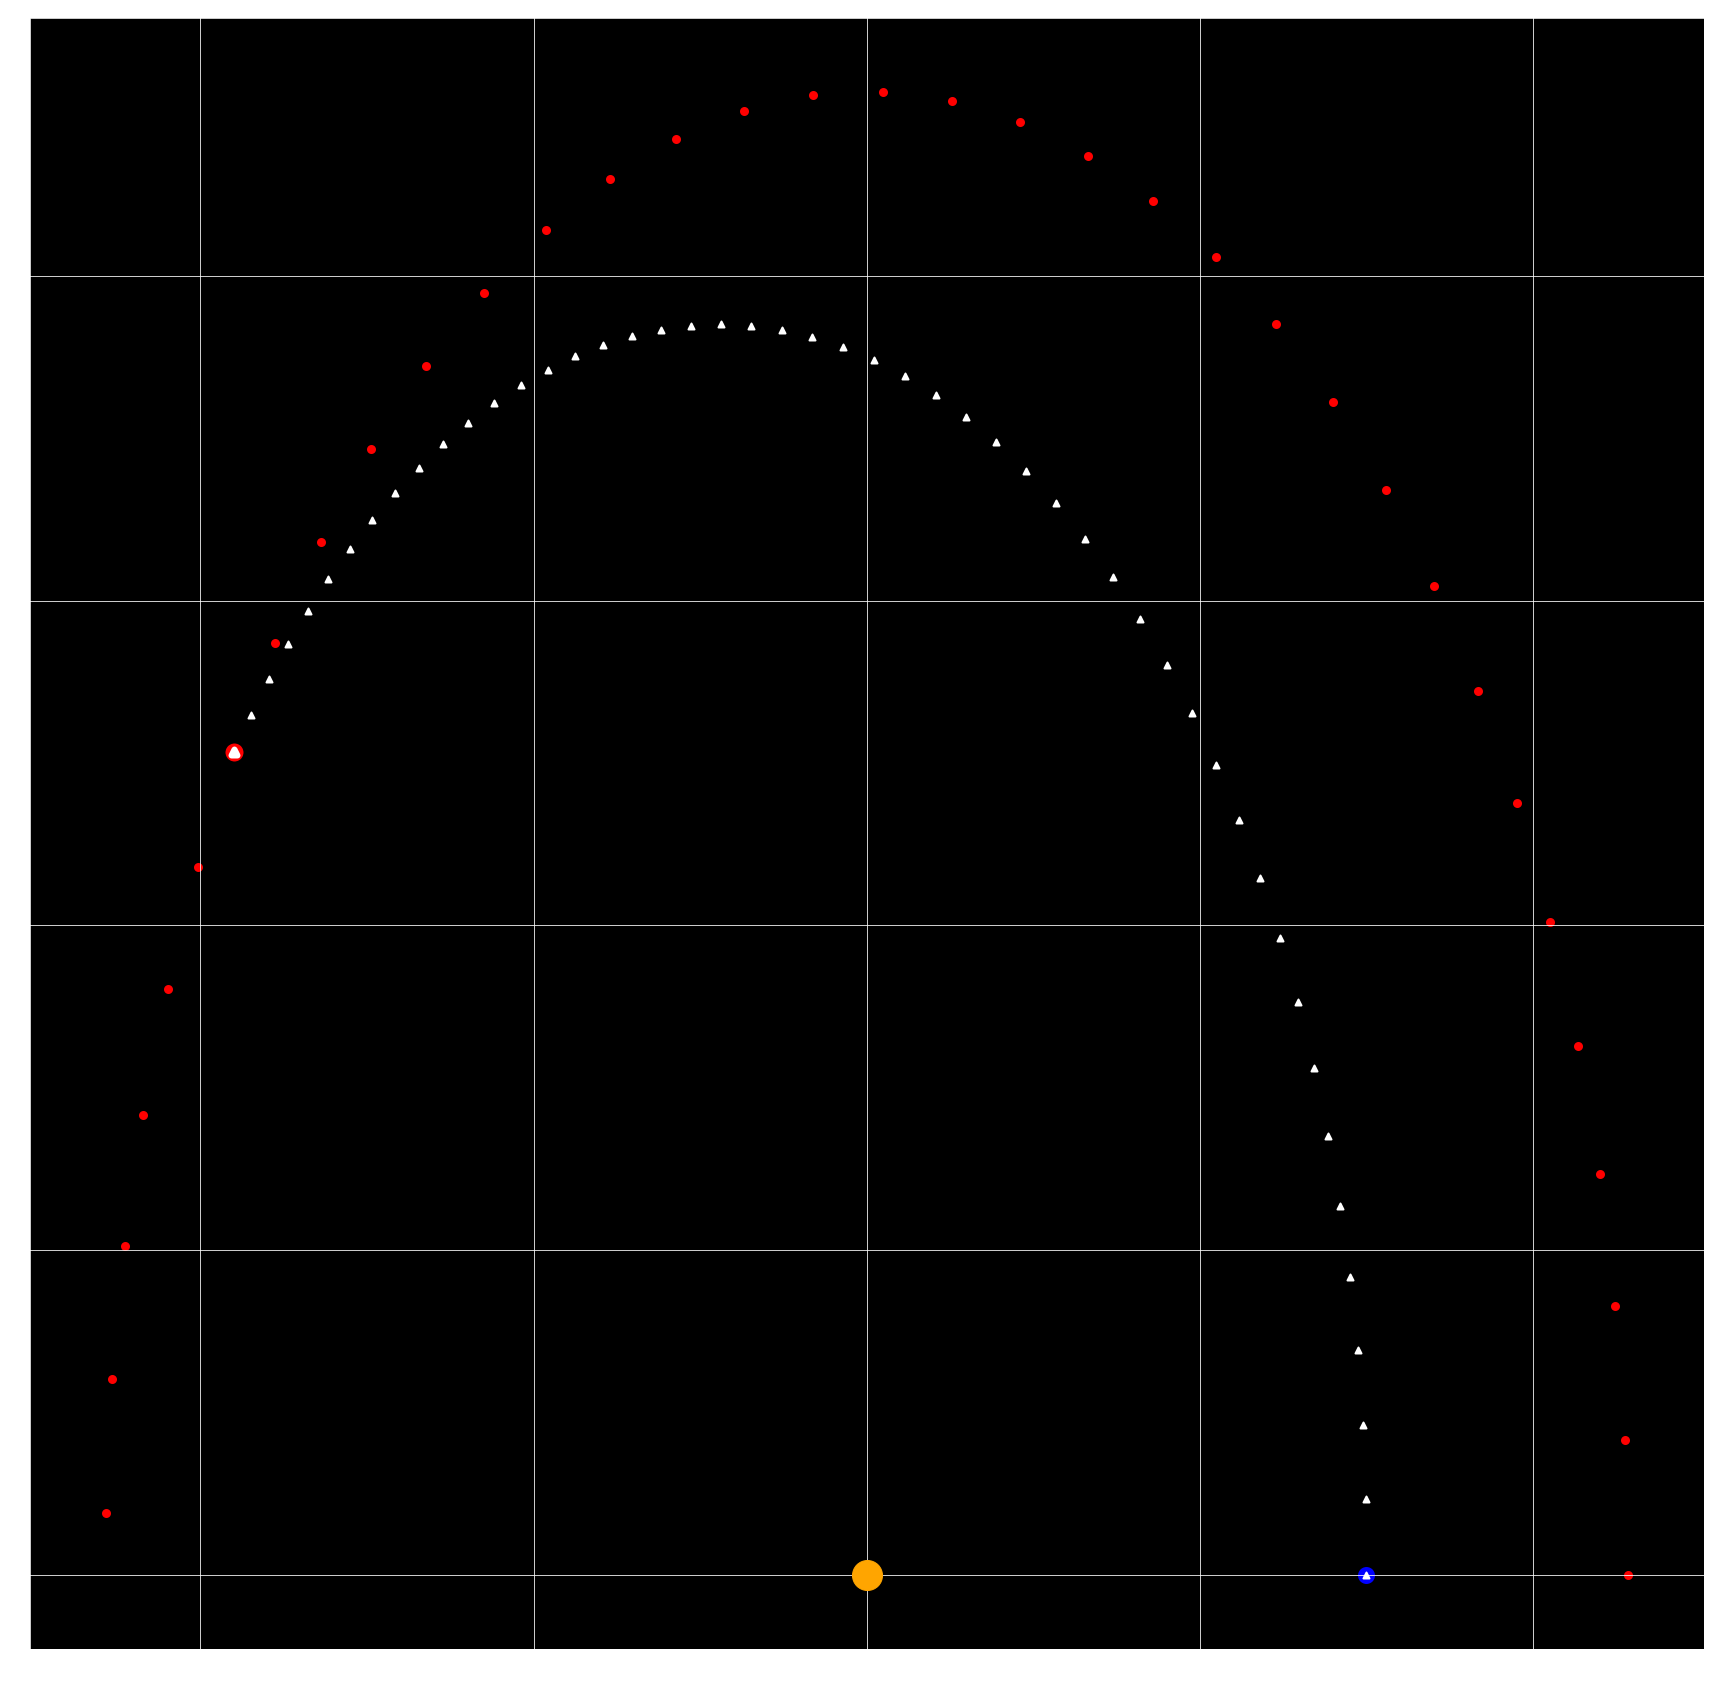

In [11]:
fig = plt.figure(figsize=(30, 30))
plt.grid()
plt.plot(0,0,marker="o", markersize=30,c='orange')
plt.scatter(x_earth,y_earth,marker="o", c='blue',linewidth=3.0)
plt.scatter(x_earth,y_earth,marker="o", c='blue',linewidth=11.0)
plt.scatter(x_mars,y_mars,marker="o",linewidth=3.0, c='red')
plt.scatter(x_mars[best_traj],y_mars[best_traj],marker="o",linewidth=12.0, c='red')
plt.scatter(sol[:,0],sol[:,2],c="w",marker="^",linewidth=2.0)
plt.scatter(sol[-1,0],sol[-1,2],c="w",marker="^",linewidth=6.0)
plt.savefig("plot.png", format='png')
plt.show()

In [12]:
'''x_earth,y_earth=[],[]
x_mars,y_mars=[],[]
for tt in range(0,int(T_mars/2),int(86400*6.9)):
    x_mars.append(R_mars*np.cos(w_mars*(tt)))
    y_mars.append(R_mars*np.sin(w_mars*(tt)))
for ttt in range(0,int(T_earth),int(86400*7.4)):
    x_earth.append(R_earth*np.cos(w_earth*(ttt)))
    y_earth.append(R_earth*np.sin(w_earth*(ttt)))
    
fig = plt.figure(figsize=(30, 30))
plt.grid()
plt.xlim([-R_mars*1.1, R_mars*1.1])
plt.ylim([-R_mars*1.1, R_mars*1.1])
def animate(i):
    plt.plot(0,0,marker="o", markersize=30,c='orange')
    plt.scatter(x_earth[i],y_earth[i],marker="o", c='blue',linewidth=5.0)
    plt.scatter(x_mars[i],y_mars[i],marker="o", c='red',linewidth=5.0)
    plt.scatter(solll[i,0],solll[i,2],c="w",marker="^",linewidth=4.0)
anim = matplotlib.animation.FuncAnimation(fig, animate)
anim.save("lambert.gif",writer=PillowWriter())'''

'x_earth,y_earth=[],[]\nx_mars,y_mars=[],[]\nfor tt in range(0,int(T_mars/2),int(86400*6.9)):\n    x_mars.append(R_mars*np.cos(w_mars*(tt)))\n    y_mars.append(R_mars*np.sin(w_mars*(tt)))\nfor ttt in range(0,int(T_earth),int(86400*7.4)):\n    x_earth.append(R_earth*np.cos(w_earth*(ttt)))\n    y_earth.append(R_earth*np.sin(w_earth*(ttt)))\n    \nfig = plt.figure(figsize=(30, 30))\nplt.grid()\nplt.xlim([-R_mars*1.1, R_mars*1.1])\nplt.ylim([-R_mars*1.1, R_mars*1.1])\ndef animate(i):\n    plt.plot(0,0,marker="o", markersize=30,c=\'orange\')\n    plt.scatter(x_earth[i],y_earth[i],marker="o", c=\'blue\',linewidth=5.0)\n    plt.scatter(x_mars[i],y_mars[i],marker="o", c=\'red\',linewidth=5.0)\n    plt.scatter(solll[i,0],solll[i,2],c="w",marker="^",linewidth=4.0)\nanim = matplotlib.animation.FuncAnimation(fig, animate)\nanim.save("lambert.gif",writer=PillowWriter())'